<a href="https://colab.research.google.com/github/JMNeto28/PDI---UFAL/blob/main/Image_Stitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Alagoas

Instituto de Computação - IC

Processamento Digital de Imagens - PDI

Professor: Thiago Vieira

Alunos: João da Silva Muniz Neto

In [72]:
import numpy as ny
from imutils import paths
import imutils
import cv2
import matplotlib.pyplot as pl
from PIL import Image

# ***Loading images and print images***

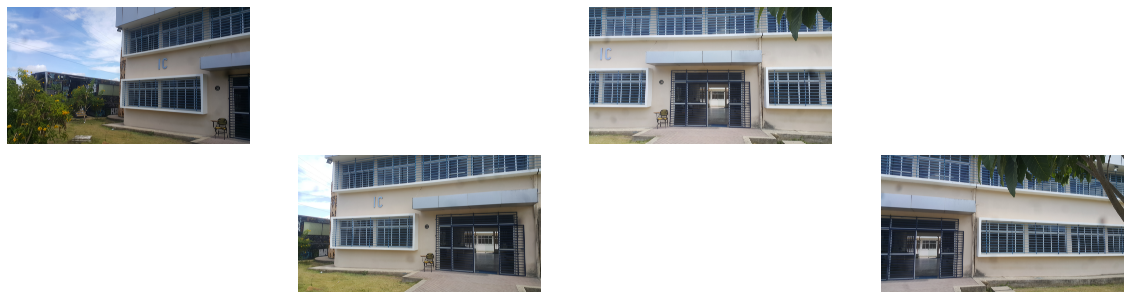

In [73]:


image_paths = sorted(list(paths.list_images('imagens/')))
ima = list()

for path in image_paths:
    imag = cv2.imread(path)
    imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
    ima.append(imag)
    
#Print das iamgens carregadas
fig = pl.figure(figsize=(20, 10))

fig.add_subplot(2, 4, 1)
pl.axis('off')
pl.imshow(Image.fromarray(ima[0]))
fig.add_subplot(1, 4, 2)
pl.axis('off')
pl.imshow(Image.fromarray(ima[1]))
fig.add_subplot(2, 4, 3)
pl.axis('off')
pl.imshow(Image.fromarray(ima[2]))
fig.add_subplot(1, 4, 4)
pl.axis('off')
pl.imshow(Image.fromarray(ima[3]))

# ***Stitching images and print result***

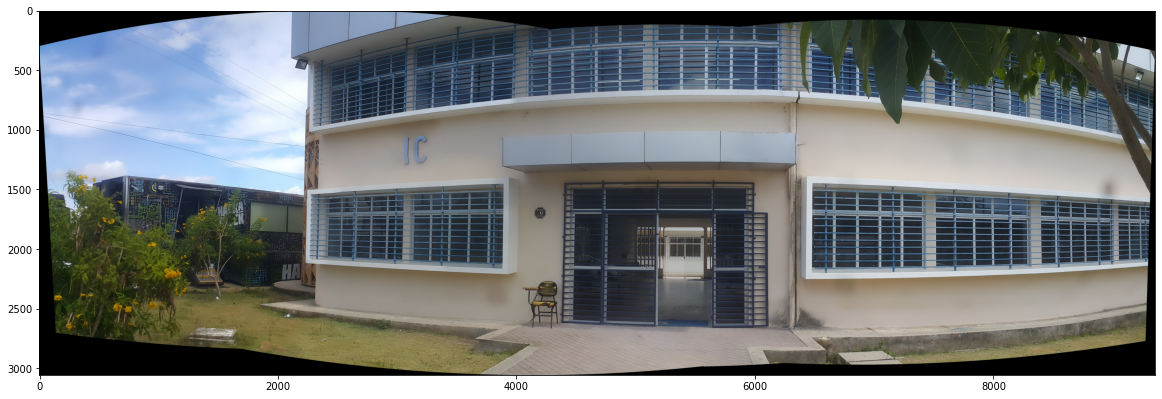

In [74]:
#stitching
stit = cv2.Stitcher_create()
stas, sti = stit.stitch(ima)

#Print stitching
if stas == 0:
    fig = pl.figure(figsize=(20, 10))
    pl.imshow(Image.fromarray(sti))
else:
    print(f'Error: {stas}')

# ***Masking image and print just mask***

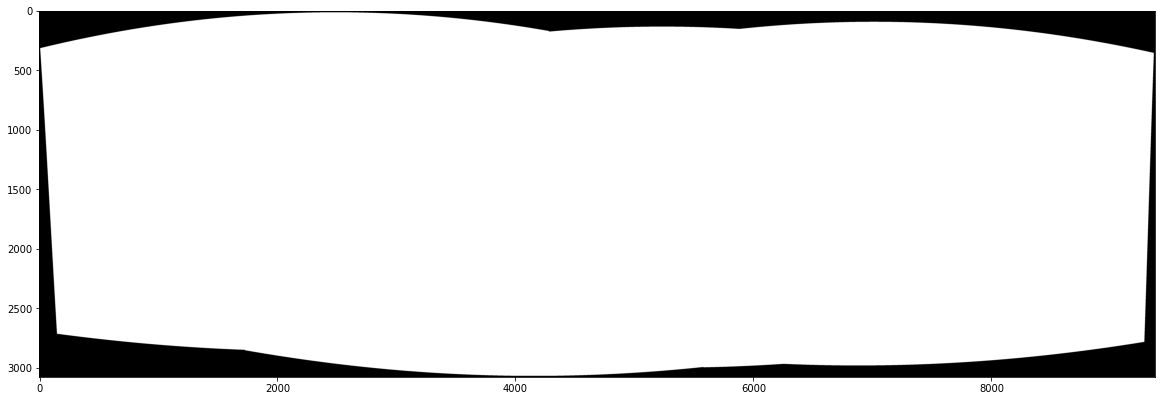

In [75]:
sti = cv2.copyMakeBorder(sti, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))

cinza = cv2.cvtColor(sti, cv2.COLOR_RGB2GRAY)
lixo = cv2.threshold(cinza, 0, 255, cv2.THRESH_BINARY)[1]
#print image mask
fig = pl.figure(figsize=(20, 10))
pl.imshow(Image.fromarray(lixo), cmap='gray')

# ***border mask and print border***

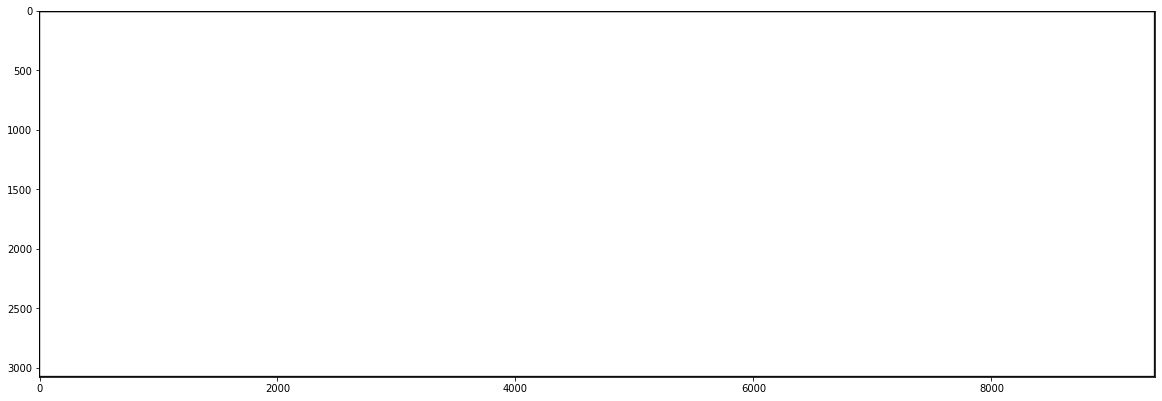

In [76]:
contador = cv2.findContours(lixo.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contador = imutils.grab_contours(contador)
c = max(contador, key=cv2.contourArea)

mk = ny.zeros(lixo.shape, dtype=ny.uint8)
x, y, w, h = cv2.boundingRect(c)
cv2.rectangle(mk, (x, y), (x + w, y + h), 255, -1)
#print mask
fig = pl.figure(figsize=(20, 10))
pl.imshow(Image.fromarray(mk), cmap='gray')

# ***Adjust image with mask and save image***

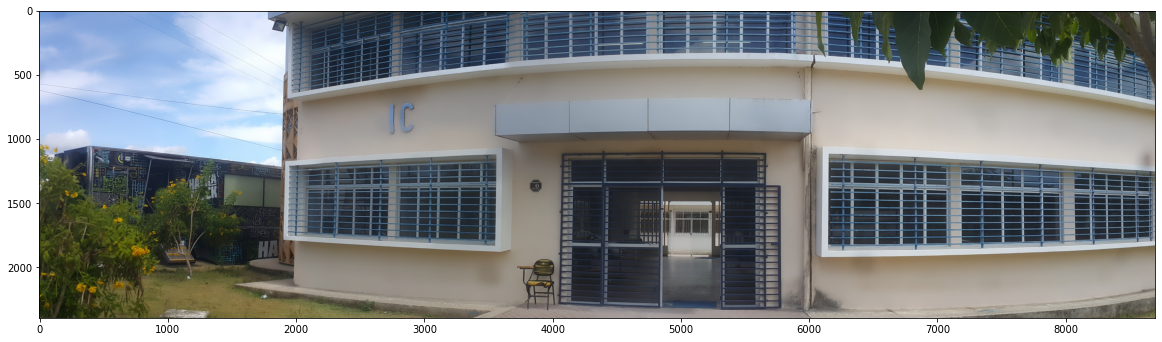

In [77]:
min_rectangle = mk.copy()
sub = mk.copy()

while cv2.countNonZero(sub) > 0:
    min_rectangle = cv2.erode(min_rectangle, None)
    sub = cv2.subtract(min_rectangle, lixo)

contador = cv2.findContours(min_rectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contador = imutils.grab_contours(contador)
c = max(contador, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

sti = sti[y:y + h, x:x + w]

fig = pl.figure(figsize=(20, 10))
pl.imshow(Image.fromarray(sti))

Image.fromarray(sti).save('imagens/ic.png', format='png')